In [80]:
!pip install kafka-python
!pip install pandas
!pip install scikit-learn
!pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 685.3 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 11.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 13.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 14.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 1.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 6.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 12.9 MB/s eta 0:00:0

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import ast
import joblib

In [93]:


stateless_heavy_attack_files = ['stateless_features-heavy_text.pcap.csv', 'stateless_features-heavy_video.pcap.csv',
                                'stateless_features-heavy_exe.pcap.csv', 'stateless_features-heavy_audio.pcap.csv',
                                'stateless_features-heavy_image.pcap.csv']

stateful_heavy_attack_files = ['stateful_features-heavy_audio.pcap.csv', 'stateful_features-heavy_exe.pcap.csv',
                               'stateful_features-heavy_image.pcap.csv', 'stateful_features-heavy_video.pcap.csv']

benign_files = ['stateless_features-benign_heavy_1.pcap.csv', 'stateless_features-benign_heavy_2.pcap.csv',
                'stateless_features-benign_heavy_3.pcap.csv', 'stateful_features-benign_heavy_1.pcap.csv',
                'stateful_features-benign_heavy_2.pcap.csv', 'stateful_features-benign_heavy_3.pcap.csv']



In [96]:
import pandas as pd

# Lists to hold DataFrames
benign_data_dfs = []
stateless_attack_data_dfs = []
stateful_attack_data_dfs = []

# Read and label benign files
for file in benign_files:
    df = pd.read_csv(file)
    df['class'] = 0  # Assign benign class
    benign_data_dfs.append(df)

# Read and label stateless attack files
for file in stateless_heavy_attack_files:
    df = pd.read_csv(file)
    df['class'] = 1  # Assign attack class
    stateless_attack_data_dfs.append(df)

# Read and label stateful attack files
for file in stateful_heavy_attack_files:
    df = pd.read_csv(file)
    df['class'] = 1  # Assign attack class
    stateful_attack_data_dfs.append(df)

# Concatenate all DataFrames into one
combined_data = pd.concat(benign_data_dfs + stateless_attack_data_dfs + stateful_attack_data_dfs, ignore_index=True)

# Ensure that you shuffle the combined data to avoid any ordering bias
from sklearn.utils import shuffle
combined_data = shuffle(combined_data).reset_index(drop=True)




In [97]:
combined_data

,timestamp,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,...,distinct_ns,distinct_ip,unique_country,unique_asn,distinct_domains,reverse_dns,a_records,unique_ttl,ttl_mean,ttl_variance
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,set(),{'US'},{'AS36236'},{'199.38.183.214': {'www.laeuropea.com.mx'}},cloud1.ecommlaeuropea.info,0.0,"[128, 128, 122, 122]",125.0,9.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,set(),set(),set(),{},unknown,0.0,"[1, 1, 1, 1]",1.0,0.0
2,2020-11-24 00:41:02.919682,24.0,7.0,0.0,10.0,8.0,2.054029,6.0,6.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-11-23 22:39:31.019929,25.0,8.0,0.0,10.0,9.0,2.556642,6.0,6.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-11-24 15:02:10.467562,24.0,7.0,0.0,10.0,8.0,2.054029,6.0,6.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509317,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,set(),{'US'},{'AS13335'},{'172.64.86.67': {'iranpress.com'}},unknown,0.0,"[128, 122]",125.0,9.0
509318,2020-11-24 14:37:28.889785,24.0,7.0,0.0,10.0,8.0,2.054029,6.0,6.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
509319,2020-11-22 13:57:27.625524,10.0,0.0,0.0,9.0,0.0,2.625000,1.0,2.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
509320,2020-11-25 01:58:55.787649,27.0,10.0,0.0,10.0,11.0,2.570417,6.0,6.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [98]:
combined_data.dtypes

timestamp            object
FQDN_count          float64
subdomain_length    float64
upper               float64
lower               float64
numeric             float64
entropy             float64
special             float64
labels              float64
labels_max          float64
labels_average      float64
longest_word         object
sld                  object
len                 float64
subdomain           float64
class                 int64
rr                  float64
A_frequency         float64
NS_frequency        float64
CNAME_frequency     float64
SOA_frequency       float64
NULL_frequency      float64
PTR_frequency       float64
HINFO_frequency     float64
MX_frequency        float64
TXT_frequency       float64
AAAA_frequency      float64
SRV_frequency       float64
OPT_frequency       float64
rr_type              object
rr_count            float64
rr_name_entropy     float64
rr_name_length      float64
distinct_ns         float64
distinct_ip          object
unique_country      

In [99]:
if 'timestamp' in combined_data.columns:
    combined_data = combined_data.drop('timestamp', axis=1)

In [100]:

print(combined_data.columns)


combined_data = combined_data.fillna(0)


Index(['FQDN_count', 'subdomain_length', 'upper', 'lower', 'numeric',
       'entropy', 'special', 'labels', 'labels_max', 'labels_average',
       'longest_word', 'sld', 'len', 'subdomain', 'class', 'rr', 'A_frequency',
       'NS_frequency', 'CNAME_frequency', 'SOA_frequency', 'NULL_frequency',
       'PTR_frequency', 'HINFO_frequency', 'MX_frequency', 'TXT_frequency',
       'AAAA_frequency', 'SRV_frequency', 'OPT_frequency', 'rr_type',
       'rr_count', 'rr_name_entropy', 'rr_name_length', 'distinct_ns',
       'distinct_ip', 'unique_country', 'unique_asn', 'distinct_domains',
       'reverse_dns', 'a_records', 'unique_ttl', 'ttl_mean', 'ttl_variance'],
      dtype='object')


In [101]:
categorical_features = ['rr_type', 'distinct_ip', 'unique_country', 'unique_asn', 'distinct_domains', 'reverse_dns', 'longest_word', 'sld','unique_ttl']


In [102]:
label_encoders = {}
for feature in categorical_features:
    if feature in combined_data.columns:
        label_encoders[feature] = LabelEncoder()
        combined_data[feature] = label_encoders[feature].fit_transform(combined_data[feature].astype(str))


if 'timestamp' in combined_data.columns:
    combined_data = combined_data.drop('timestamp', axis=1)

In [103]:
numerical_features = combined_data.columns.drop(categorical_features)



In [104]:
def average_list(value):
    try:
        lst = ast.literal_eval(value)
        return sum(lst) / len(lst)
    except (SyntaxError, ValueError):
        return value

In [105]:
X = combined_data.drop('class', axis=1)
y = combined_data['class']

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [108]:
combined_data.dtypes

FQDN_count          float64
subdomain_length    float64
upper               float64
lower               float64
numeric             float64
entropy             float64
special             float64
labels              float64
labels_max          float64
labels_average      float64
longest_word          int64
sld                   int64
len                 float64
subdomain           float64
class                 int64
rr                  float64
A_frequency         float64
NS_frequency        float64
CNAME_frequency     float64
SOA_frequency       float64
NULL_frequency      float64
PTR_frequency       float64
HINFO_frequency     float64
MX_frequency        float64
TXT_frequency       float64
AAAA_frequency      float64
SRV_frequency       float64
OPT_frequency       float64
rr_type               int64
rr_count            float64
rr_name_entropy     float64
rr_name_length      float64
distinct_ns         float64
distinct_ip           int64
unique_country        int64
unique_asn          

In [19]:
def convert_unique_ttl(value):
    try:
        lst = ast.literal_eval(value)
        return sum(lst) / len(lst)
    except (SyntaxError, ValueError):
        return 0

combined_data['unique_ttl'] = combined_data['unique_ttl'].apply(convert_unique_ttl)

In [109]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=50, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.8184754331713543
Precision: 0.7378947971251038
Recall: 0.9964425884036116
F1-score: 0.8478970790250804


In [110]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)


print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[31835 18307]
 [  184 51539]]


In [111]:
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score


# Gradient Boosting Classifier model
gbm_model = GradientBoostingClassifier(random_state=42)
gbm_model.fit(X_train, y_train)
y_pred_gbm = gbm_model.predict(X_test)
accuracy_gbm = accuracy_score(y_test, y_pred_gbm)
print("Accuracy of GBM:", accuracy_gbm)


Accuracy of GBM: 0.8177980660678349


In [113]:
joblib.dump(gbm_model, 'gbm_model.pkl')

['gbm_model.pkl']

In [42]:
schema= {
  "$schema": "http://json-schema.org/draft-07/schema#",
  "type": "object",
  "properties": {
    "FQDN_count": {"type": "number"},
    "subdomain_length": {"type": "number"},
    "upper": {"type": "number"},
    "lower": {"type": "number"},
    "numeric": {"type": "number"},
    "entropy": {"type": "number"},
    "special": {"type": "number"},
    "labels": {"type": "number"},
    "labels_max": {"type": "number"},
    "labels_average": {"type": "number"},
    "longest_word": {"type": "integer"},
    "sld": {"type": "integer"},
    "len": {"type": "number"},
    "subdomain": {"type": "number"},
    "rr": {"type": "number"},
    "A_frequency": {"type": "number"},
    "NS_frequency": {"type": "number"},
    "CNAME_frequency": {"type": "number"},
    "SOA_frequency": {"type": "number"},
    "NULL_frequency": {"type": "number"},
    "PTR_frequency": {"type": "number"},
    "HINFO_frequency": {"type": "number"},
    "MX_frequency": {"type": "number"},
    "TXT_frequency": {"type": "number"},
    "AAAA_frequency": {"type": "number"},
    "SRV_frequency": {"type": "number"},
    "OPT_frequency": {"type": "number"},
    "rr_type": {"type": "integer"},
    "rr_count": {"type": "number"},
    "rr_name_entropy": {"type": "number"},
    "rr_name_length": {"type": "number"},
    "distinct_ns": {"type": "number"},
    "distinct_ip": {"type": "integer"},
    "unique_country": {"type": "integer"},
    "unique_asn": {"type": "integer"},
    "distinct_domains": {"type": "integer"},
    "reverse_dns": {"type": "integer"},
    "a_records": {"type": "number"},
    "unique_ttl": {"type": "integer"},
    "ttl_mean": {"type": "number"},
    "ttl_variance": {"type": "number"},
    "class": {"type": "integer"}
  },
  "required": [
    "FQDN_count", "subdomain_length", "upper", "lower", "numeric", "entropy", "special", "labels", "labels_max", "labels_average",
    "longest_word", "sld", "len", "subdomain", "rr", "A_frequency", "NS_frequency", "CNAME_frequency", "SOA_frequency",
    "NULL_frequency", "PTR_frequency", "HINFO_frequency", "MX_frequency", "TXT_frequency", "AAAA_frequency", "SRV_frequency",
    "OPT_frequency", "rr_type", "rr_count", "rr_name_entropy", "rr_name_length", "distinct_ns", "distinct_ip", "unique_country",
    "unique_asn", "distinct_domains", "reverse_dns", "a_records", "unique_ttl", "ttl_mean", "ttl_variance", "class"
  ]
}


In [115]:
subset_data = combined_data.groupby('class').apply(lambda x: x.sample(frac=0.1)).reset_index(drop=True)



/tmp/ipykernel_216/1737535416.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  subset_data = combined_data.groupby('class').apply(lambda x: x.sample(frac=0.1)).reset_index(drop=True)


In [72]:
predicted_probabilities = []

In [65]:
actual_classes = []
predicted_classes = []

In [123]:
from sklearn.utils import shuffle

In [125]:
import time

# Processing time limit in seconds
time_limit = 120  # 5 minutes
start_time = time.time()

# Load the model
model = joblib.load('gbm_model.pkl')

# Initialize Kafka consumer
consumer = KafkaConsumer(
    'data_topic',
    bootstrap_servers=['kafka:9092'],
    auto_offset_reset='earliest',  # Start reading at the earliest message
    value_deserializer=lambda x: json.loads(x.decode('utf-8'))  # Deserialize data from JSON
)

# Feature names as used during model training
feature_names = ['FQDN_count', 'subdomain_length', 'upper', 'lower', 'numeric', 'entropy', 'special', 'labels', 
                 'labels_max', 'labels_average', 'longest_word', 'sld', 'len', 'subdomain', 'rr', 'A_frequency', 
                 'NS_frequency', 'CNAME_frequency', 'SOA_frequency', 'NULL_frequency', 'PTR_frequency', 
                 'HINFO_frequency', 'MX_frequency', 'TXT_frequency', 'AAAA_frequency', 'SRV_frequency', 
                 'OPT_frequency', 'rr_type', 'rr_count', 'rr_name_entropy', 'rr_name_length', 'distinct_ns', 
                 'distinct_ip', 'unique_country', 'unique_asn', 'distinct_domains', 'reverse_dns', 'a_records', 
                 'unique_ttl', 'ttl_mean', 'ttl_variance', 'class']

# Process messages
for message in consumer:
    if (time.time() - start_time) > time_limit:
        break  # Stop after the time limit has passed
    data = message.value
    # Create DataFrame with correct column names and order
    actual_class = data.get('class') if 'class' in data else 'Unknown'
    data_df = pd.DataFrame([data], columns=feature_names)
    data_df= shuffle(data_df).reset_index(drop=True)
    data_df=data_df.drop('class', axis=1)
    actual_classes.append(actual_class)
    predicted_classes.append(prediction[0])
    probabilities = model.predict_proba(data_df)[0]
    predicted_probabilities.append(probabilities)
    # Predict
    prediction = model.predict(data_df)
    print(f"Actual class: {actual_class}, Predicted class: {prediction[0]}")



Actual class: 0, Predicted class: 1
Actual class: 0, Predicted class: 0
Actual class: 0, Predicted class: 1
Actual class: 0, Predicted class: 0
Actual class: 0, Predicted class: 0
Actual class: 0, Predicted class: 1
Actual class: 0, Predicted class: 0
Actual class: 0, Predicted class: 0
Actual class: 0, Predicted class: 1
Actual class: 0, Predicted class: 0
Actual class: 0, Predicted class: 0
Actual class: 0, Predicted class: 0
Actual class: 0, Predicted class: 1
Actual class: 0, Predicted class: 1
Actual class: 0, Predicted class: 0
Actual class: 0, Predicted class: 1
Actual class: 0, Predicted class: 0
Actual class: 0, Predicted class: 1
Actual class: 0, Predicted class: 1
Actual class: 0, Predicted class: 1
Actual class: 0, Predicted class: 0
Actual class: 0, Predicted class: 1
Actual class: 0, Predicted class: 0
Actual class: 0, Predicted class: 0
Actual class: 0, Predicted class: 0
Actual class: 0, Predicted class: 0
Actual class: 0, Predicted class: 0
Actual class: 0, Predicted c

KeyboardInterrupt: 

In [69]:
!pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.5/159.5 kB 3.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 30.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 306.0/306.0 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 25.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 30.3 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 29.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 1.0 MB/s eta 0:00:00:00:01


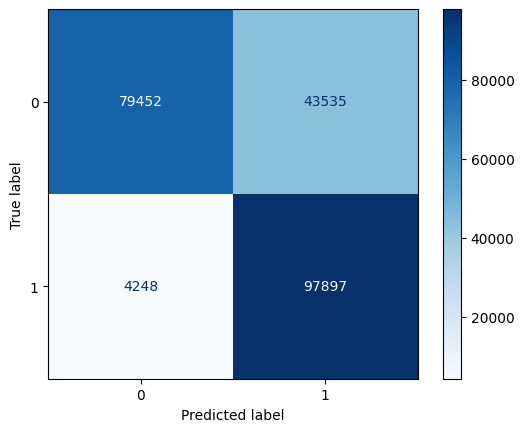

In [126]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(actual_classes, predicted_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot(cmap=plt.cm.Blues)
plt.show()


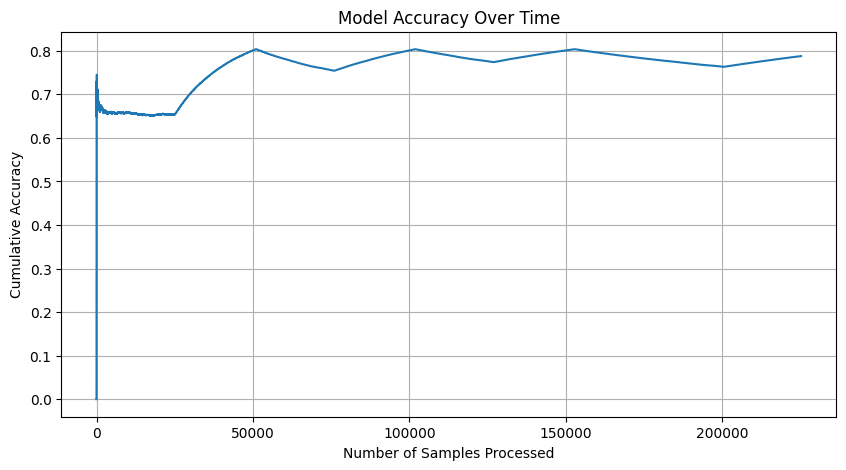

In [127]:
import numpy as np

# Calculate cumulative accuracy after each prediction
accuracies = np.cumsum(np.array(actual_classes) == np.array(predicted_classes)) / (np.arange(len(actual_classes)) + 1)

plt.figure(figsize=(10, 5))
plt.plot(accuracies)
plt.title('Model Accuracy Over Time')
plt.xlabel('Number of Samples Processed')
plt.ylabel('Cumulative Accuracy')
plt.grid(True)
plt.show()


In [120]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler

# Assuming X_train, y_train, X_test, y_test are already prepared and split

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the neural network model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=50, batch_size=32)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {test_acc}")


Epoch 1/50


/opt/conda/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10187/10187 ━━━━━━━━━━━━━━━━━━━━ 8s 745us/step - accuracy: 0.8114 - loss: 0.4177 - val_accuracy: 0.8175 - val_loss: 0.3999
Epoch 2/50
10187/10187 ━━━━━━━━━━━━━━━━━━━━ 8s 741us/step - accuracy: 0.8174 - loss: 0.4030 - val_accuracy: 0.8179 - val_loss: 0.4001
Epoch 3/50
10187/10187 ━━━━━━━━━━━━━━━━━━━━ 7s 729us/step - accuracy: 0.8166 - loss: 0.4032 - val_accuracy: 0.8174 - val_loss: 0.3997
Epoch 4/50
10187/10187 ━━━━━━━━━━━━━━━━━━━━ 7s 731us/step - accuracy: 0.8172 - loss: 0.4028 - val_accuracy: 0.8179 - val_loss: 0.3991
Epoch 5/50
10187/10187 ━━━━━━━━━━━━━━━━━━━━ 8s 761us/step - accuracy: 0.8173 - loss: 0.4031 - val_accuracy: 0.8179 - val_loss: 0.3985
Epoch 6/50
10187/10187 ━━━━━━━━━━━━━━━━━━━━ 8s 766us/step - accuracy: 0.8169 - loss: 0.4023 - val_accuracy: 0.8179 - val_loss: 0.3987
Epoch 7/50
10187/10187 ━━━━━━━━━━━━━━━━━━━━ 8s 805us/step - accuracy: 0.8172 - loss: 0.4016 - val_accuracy: 0.8178 - val_loss: 0.3991
Epoch 8/50
10187/10187 ━━━━━━━━━━━━━━━━━━━━ 8s 752us/step - accuracy: 0.8

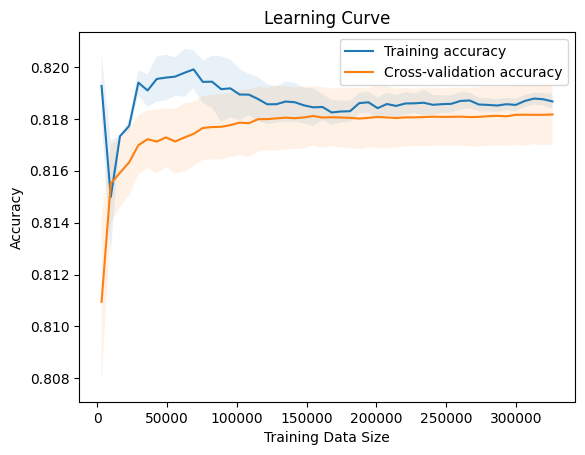

In [82]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Assuming you have a classification model and training data ready
train_sizes, train_scores, val_scores = learning_curve(
    RandomForestClassifier(), X_train, y_train, cv=5,
    scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 50))

# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot the learning curves
plt.plot(train_sizes, train_mean, label='Training accuracy')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)

plt.plot(train_sizes, val_mean, label='Cross-validation accuracy')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1)

plt.title('Learning Curve')
plt.xlabel('Training Data Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')


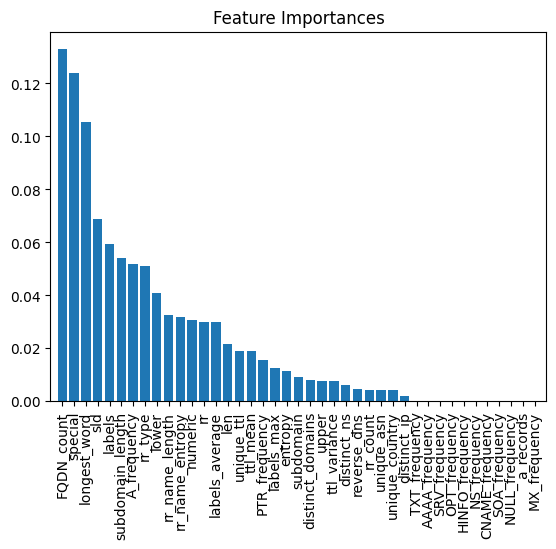

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

model = RandomForestClassifier().fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure()
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()


In [87]:
importances

array([1.32960084e-01, 5.40788711e-02, 7.77181736e-03, 4.08543370e-02,
       3.05234356e-02, 1.13541164e-02, 1.24018766e-01, 5.95474359e-02,
       1.27057527e-02, 2.97106930e-02, 1.05280616e-01, 6.86408629e-02,
       2.17338192e-02, 9.03139013e-03, 2.99418787e-02, 5.17990989e-02,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.55973008e-02, 0.00000000e+00, 0.00000000e+00, 2.26211739e-06,
       1.16579349e-06, 0.00000000e+00, 0.00000000e+00, 5.12020053e-02,
       4.35735654e-03, 3.16549268e-02, 3.25753650e-02, 6.11557843e-03,
       2.06133995e-03, 4.12781823e-03, 4.20806043e-03, 8.07345673e-03,
       4.63978238e-03, 0.00000000e+00, 1.89872339e-02, 1.87834695e-02,
       7.65990236e-03])

In [85]:
from sklearn.metrics import classification_report, roc_auc_score

predictions = model.predict(X_test)
probabilities = model.predict_proba(X_test)[:, 1]

print(classification_report(y_test, predictions))
print("ROC AUC Score:", roc_auc_score(y_test, probabilities))


              precision    recall  f1-score   support

           0       0.99      0.63      0.77     50142
           1       0.74      1.00      0.85     51723

    accuracy                           0.82    101865
   macro avg       0.87      0.81      0.81    101865
weighted avg       0.86      0.82      0.81    101865

ROC AUC Score: 0.8242484985700758


In [86]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print("Cross-validated scores:", scores)
print("Mean cross-validation score:", scores.mean())


Cross-validated scores: [0.3933834  0.80482992 0.80855847 0.80897078 0.8541683 ]
Mean cross-validation score: 0.733982175816144


In [88]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

# Define a more complex neural network architecture
model = Sequential([
    Dense(512, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model, including a validation split to monitor performance on unseen data
history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=100, batch_size=64)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {test_acc}")


/opt/conda/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
5094/5094 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.8038 - loss: 0.4401 - val_accuracy: 0.8166 - val_loss: 0.4030
Epoch 2/100
5094/5094 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.8154 - loss: 0.4119 - val_accuracy: 0.8170 - val_loss: 0.4020
Epoch 3/100
5094/5094 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.8160 - loss: 0.4097 - val_accuracy: 0.8170 - val_loss: 0.4020
Epoch 4/100
5094/5094 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.8160 - loss: 0.4081 - val_accuracy: 0.8174 - val_loss: 0.4045
Epoch 5/100
5094/5094 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.8169 - loss: 0.4065 - val_accuracy: 0.8172 - val_loss: 0.4027
Epoch 6/100
5094/5094 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.8167 - loss: 0.4057 - val_accuracy: 0.8175 - val_loss: 0.4009
Epoch 7/100
5094/5094 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.8175 - loss: 0.4045 - val_accuracy: 0.8173 - val_loss: 0.4016
Epoch 8/100
5094/5094 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.8170 -